## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Defining path
path=r'C:\Users\dolson\OneDrive - BEACON TECHNOLOGIES\Desktop\Achievement6'

In [4]:
# Import boat data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boatclean6.2.csv'), index_col=[0])

### 2. Data cleaning

In [5]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Views last 7 days', 'EUR_Price', 'Country', 'City',
       'PriceCategory'],
      dtype='object')

In [6]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,EUR_Price,Country,City,PriceCategory
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3337,Switzerland,Lake Geneva,Low-priced
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,Low-priced
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,29266,Denmark,Svendborg,Low-priced
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,Low-priced
6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600,Switzerland,Neuenburgersee,Low-priced


In [7]:
df.shape

(9241, 12)

##### Missing values

In [8]:
# Check for missing values
df.isnull().sum()

# No missing values to handle

Boat Type            0
Manufacturer         0
Type                 0
Year Built           0
Length               0
Width                0
Material             0
Views last 7 days    0
EUR_Price            0
Country              0
City                 0
PriceCategory        0
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(9241,)

##### Extreme values checks per earlier analyais looking at boat length and Eur prices of boats


C:\Users\dolson\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

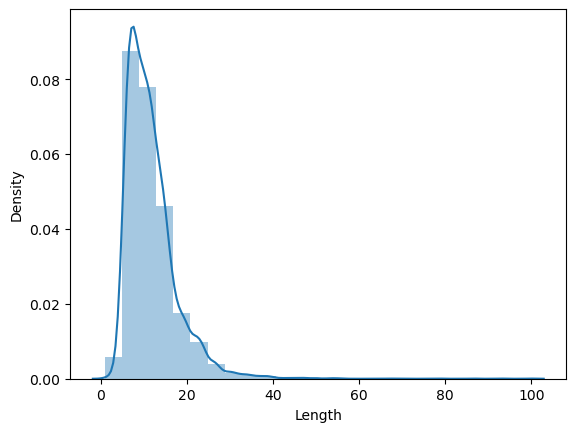

In [11]:
# Check for extreme values 
sns.distplot(df['Length'], bins=25) # Shows extreme values


In [12]:
df['Length'].mean() # Check the mean

11.71705226707066

In [13]:
df['Length'].median() # Check the median

10.5

In [14]:
df['Length'].max() # Check the max

100.0

### 3. Data prep for regression analysis 

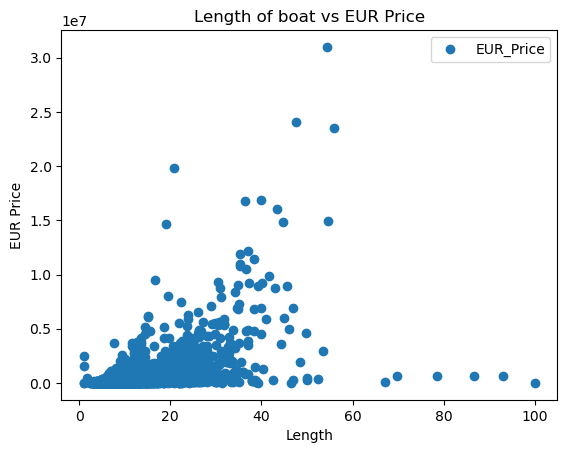

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='EUR_Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of boat vs EUR Price')  
plt.xlabel('Length')  
plt.ylabel('EUR Price')  
plt.show()

My hypothesis - if a boat is longer, then it will be more expensive 

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Length'].values.reshape(-1,1)
y = df['EUR_Price'].values.reshape(-1,1)

In [17]:
X

array([[4.  ],
       [4.  ],
       [3.  ],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [18]:
y

array([[ 3337],
       [ 3490],
       [29266],
       ...,
       [ 4499],
       [ 4300],
       [ 3780]], dtype=int64)

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

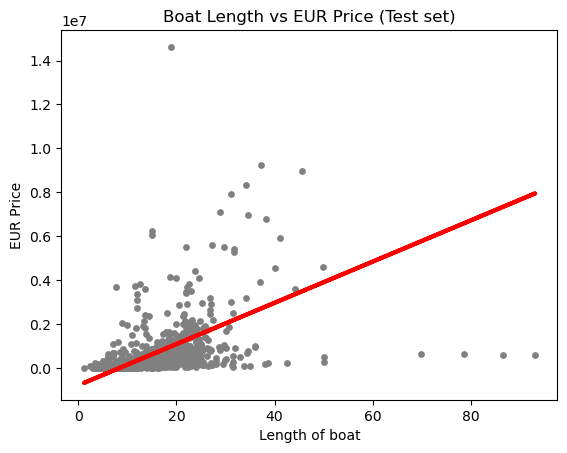

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat Length vs EUR Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('EUR Price')
#plot_test.show()
plot_test.savefig("PlotTestPriceLength")

plot_test.show()

In [29]:
# What is current directory saving to
cwd = os.getcwd()
cwd

'C:\\Users\\dolson\\OneDrive - BEACON TECHNOLOGIES\\Desktop\\Achievement6\\03 Scripts'

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[93932.24554584]]
Mean squared error:  455482580589.7791
R2 score:  0.1315009192814076


#### Interpretation test set
Positive slope of regression line is a positive relationship (as x rise so does y). Mean squared error(MSE) is fairly high,meaning that the regression line isn't an accurate representation of data.  The R2 score,is low (.13) confirms that the model is not a good representation, of the variance of the data. Model is not performing well, 

In [32]:
y_predicted

array([[-232817.66493595],
       [ 246236.78734784],
       [  97823.83938541],
       ...,
       [1510564.81239486],
       [ 520518.9443417 ],
       [-217788.50564861]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52900,-2.328177e+05
1,40000,2.462368e+05
2,275445,9.782384e+04
3,112000,2.424795e+05
4,6057506,6.172692e+05
5,249000,5.712424e+05
6,69000,6.400823e+04
7,35990,-2.281211e+05
8,367000,4.979752e+05
9,449000,8.389493e+05


Above comparison of actual and predicted variances confirm that the model isn't doing a good job of explaining the relationship between "Length of boat" and EUR Price. 

##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[93932.24554584]]
Mean squared error:  792048780049.283
R2 score:  0.27854928432419523


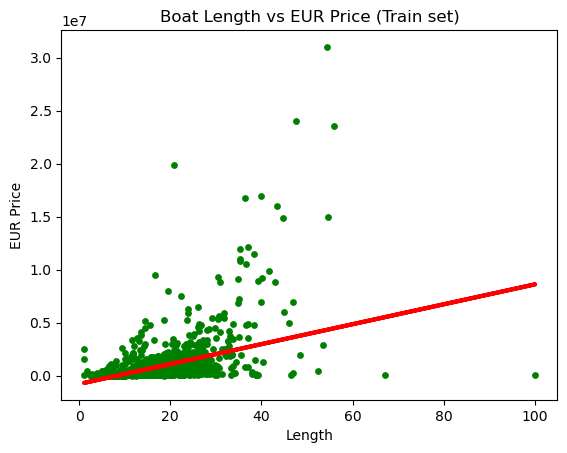

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Boat Length vs EUR Price (Train set)')
plot_test.xlabel('Length')
plot_test.ylabel('EUR Price')
plot_test.show()

Train set has a positive relationship (as x rises so does y). MSE is (79), high, meaning that that regressing line isn't an accurate representation of data.  The  R2 score is low (.27) confirms that the model is not a good representation, of the variance of the data. The train model is not perfroming well either. 


In comparison of the two models, both have a postivie relationship (as x rises so does y). both have high MSE and low R2's confirmnig that both models are not good representation models of the data. With a boat price hypothesis, the length is not the only influencer on the price of the boat, other variables would be factored with the price (material, age, condition, make etc.)